# d1=3

          1        10  100       500      1000      1500      2000      4000  \
3  0.000002  0.000001  NaN  0.000023  0.000052  0.000109  0.000206  0.000661   
5       NaN       NaN  NaN       NaN       NaN  0.000003  0.000010  0.000072   
7       NaN       NaN  NaN       NaN       NaN  0.000002       NaN  0.000005   
9       NaN       NaN  NaN       NaN       NaN       NaN       NaN       NaN   

       6000      8000  ...     16000    20000    25000    30000    35000  \
3  0.001504  0.002731  ...  0.010130  0.01526  0.02328  0.03334  0.04408   
5  0.000216  0.000510  ...  0.003874  0.00784  0.01364  0.02068  0.03194   
7  0.000018  0.000088  ...  0.001150  0.00272  0.00618  0.01140  0.01948   
9       NaN       NaN  ...       NaN  0.00070  0.00242  0.00566  0.01112   

     40000    50000    60000    70000    80000  
3  0.05606  0.08016  0.10824  0.13320  0.16256  
5  0.04428  0.07624  0.11958  0.16214  0.20782  
7  0.03222  0.06278  0.11266  0.16852  0.22536  
9  0.01920  0.04904  0

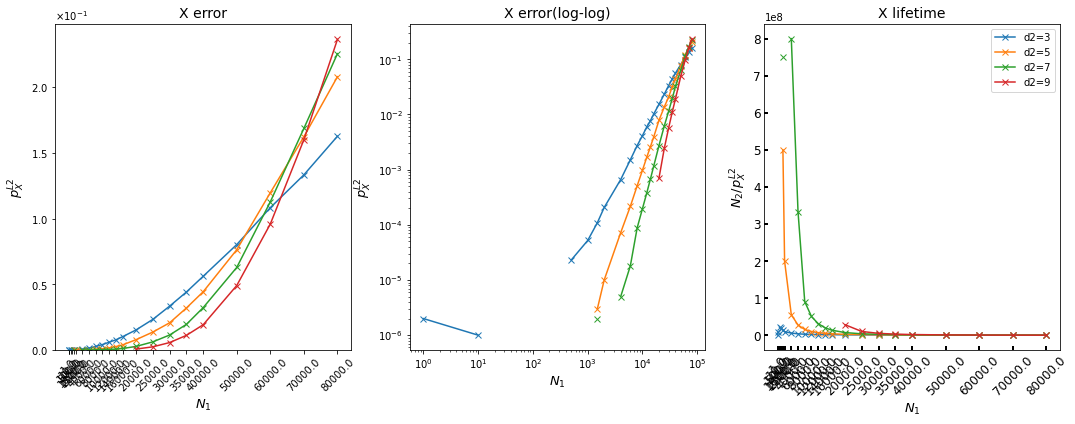

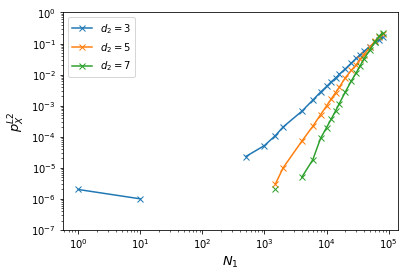

In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0001,eta=1000"
# ファイル名

file1 = "X error,p=0.0001,d2=(3,9,2),eta=1000,trials=50000,ver1" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0).replace(0, np.nan)
print(data1)

# データフレームの行名(リスト)を取得
code_distance_list = data1.index

# データフレームの列名(リスト)を取得
round_list = data1.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='x',label="d2="+str(code_distance_list[i]))
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[0].set_xticklabels(a, rotation=45)
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_X^{L2}$', fontsize=13)
axes[0].set_title("X error", fontsize=14)
axes[1].set_title("X error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[1].set_xticks(a)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("X lifetime", fontsize=14)
axes[2].set_xticks(a)
axes[2].set_xticklabels(a, rotation=45)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data1.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # y軸指数表記
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-7,1e-0)
#ax.set_xticklabels(a, rotation=45)
plt.legend()
plt.show()

[1.88842643]
-9.935806869144761
[2.63775334]
-13.478733067600686
[3.60509441]
-18.08126955065998


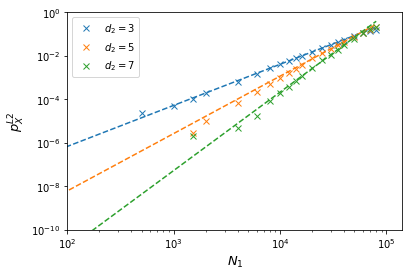

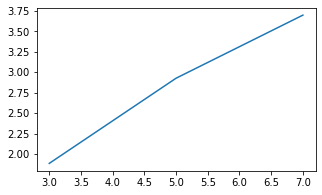

In [10]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data1.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-10:-5], Y[-10:-5])
    print(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(100,)
ax.set_ylim(0.0000000001, 1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], [1.88464129,2.92684433,3.69856679])

[   5555.55555556   61349.69325153  621118.01242236 2314814.81481481
 3076923.07692308 3631961.2590799  4106776.18069815 4102564.1025641
 3692307.69230792 3212851.40562262 2840909.09090917 2419354.83870973
 2304526.74897123 2073882.04795855 1749475.15745278 1604707.14094679
 1432811.38061612 1297016.8612192  1197365.79525045 1109754.74420153
  961353.58584888  874253.24202244  785545.95443833  727140.51990547
  685557.58683729  656900.74229784]
[   66666.66666667   526315.78947368  6250000.         24999999.99999999
 32258064.51612901 33333333.33333331 37037037.03703701 22857142.85714286
 14457831.3253012  11111111.11111111  9523809.52381043  7430340.557276
  6100217.86492401  5237315.87561392  4100041.00041009  3237118.96412198
  2574002.5740026   2110539.5066614   1798920.64761144  1539645.88144727
  1113089.93766696   887049.08338261   734445.49365229   635374.47383051
   567859.17092561   514827.01812191]
[           nan            nan            nan            nan
 1.00000000e+09 

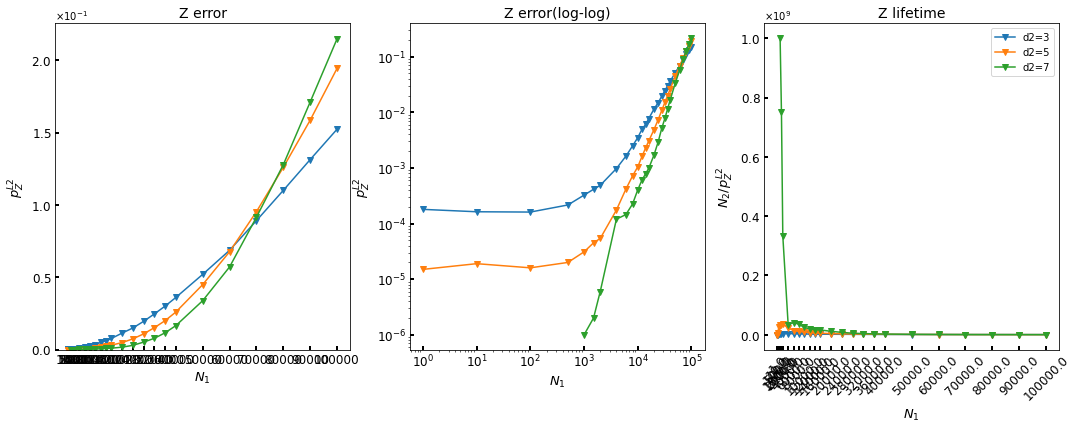

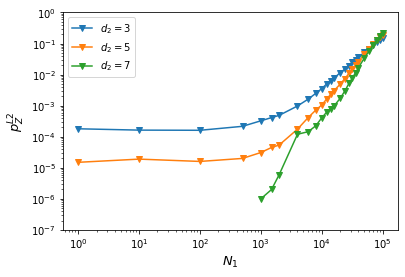

In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0001,eta=1000"

# ファイル名
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver_last" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
round_list = data2.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    print(a[0:]/b[0:])
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
#xes[0].set_xticklabels(a, rotation=45)
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_Z^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("Z error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("Z error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[2].set_xscale("log")
#axes[2].set_yscale("log")
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("Z lifetime", fontsize=14)
axes[2].set_xticks(a)
axes[2].set_xticklabels(a, rotation=45)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e-0)
plt.legend()
plt.show()

[1.169516]
-7.116980039226951
[1.71618536]
-9.815413681967254
[2.55651672]
-13.612347408660572


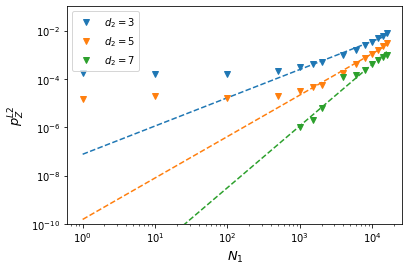

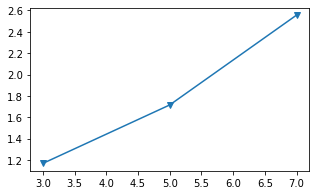

In [29]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
coef_list = []
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-10:], Y[-10:])
    print(clf.coef_)
    coef_list.append(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000000001, 0.1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], coef_list,marker='v')

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/1430570901.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/1430570901.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/1430570901.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/1430570901.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/1430570901.py:67: R

74002053.38809034
1112314814.814814
42091000000.0


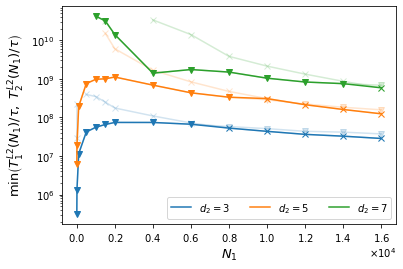

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver0のコピー" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[9:], code_distance_list1[i]*(6*a[9:]+4*3+1)/b[9:],marker='x',color = cm(i))
        d = np.array(data2.loc[code_distance_list[i]])
        axes.plot(c[0:9], code_distance_list1[i]*(6*c[0:9]+4*3+1)/d[0:9],marker='v',color = cm(i))
        axes.plot((c[8],a[9]), (code_distance_list1[i]*(6*c[8]+4*3+1)/d[8],code_distance_list1[i]*(6*a[9]+4*3+1)/b[9]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[6]+4*3+1)/d[6])
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*3+1)/b[10:],marker='x',color = cm(i))
        d = np.array(data2.loc[code_distance_list[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*3+1)/d[:10],marker='v',color = cm(i))
        axes.plot((c[9],a[10]), (code_distance_list1[i]*(6*c[9]+4*3+1)/d[9],code_distance_list1[i]*(6*a[10]+4*3+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[6]+4*3+1)/d[6])
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*3+1)/b[13:],marker='x',color = cm(i))
        d = np.array(data2.loc[code_distance_list[i]])
        axes.plot(c[:13], code_distance_list1[i]*(6*c[:13]+4*3+1)/d[:13],marker='v',color = cm(i))
        axes.plot((c[12],a[13]), (code_distance_list1[i]*(6*c[12]+4*3+1)/d[12],code_distance_list1[i]*(6*a[13]+4*3+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[4]+4*3+1)/d[4])

plt.plot([], [], label = r"$d_2=3$", color = cm(0)) #凡例Aのダミープロット
plt.plot([], [], label = r"$d_2=5$", color = cm(1)) #凡例Bのダミープロット
plt.plot([], [], label = r"$d_2=7$", color = cm(2)) #凡例Bのダミープロット

axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.set_xticks(a)
#axes.set_xticklabels(a, rotation=45)
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend(ncol=3)
plt.show()



/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/2962638482.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/2962638482.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/2962638482.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/2962638482.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(c, code_distance_list1[i]*(6*c+4*3+1)/d/10000,marker='v',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_9

7400.205338809034
111231.48148148142
4209100.0


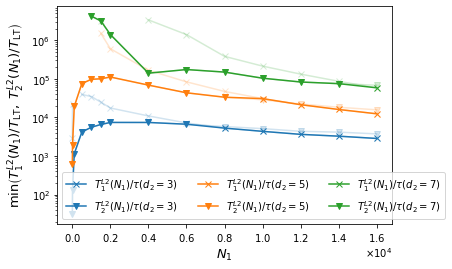

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver0のコピー" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*3+1)/d/10000,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[9:], code_distance_list1[i]*(6*a[9:]+4*3+1)/b[9:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list[i]])
        axes.plot(c[0:9], code_distance_list1[i]*(6*c[0:9]+4*3+1)/d[0:9]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[8],a[9]), (code_distance_list1[i]*(6*c[8]+4*3+1)/d[8]/10000,code_distance_list1[i]*(6*a[9]+4*3+1)/b[9]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[6]+4*3+1)/d[6]/10000)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*3+1)/b[10:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*3+1)/d[:10]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[10]), (code_distance_list1[i]*(6*c[9]+4*3+1)/d[9]/10000,code_distance_list1[i]*(6*a[10]+4*3+1)/b[10]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[6]+4*3+1)/d[6]/10000)
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*3+1)/b[13:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list[i]])
        axes.plot(c[:13], code_distance_list1[i]*(6*c[:13]+4*3+1)/d[:13]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[12],a[13]), (code_distance_list1[i]*(6*c[12]+4*3+1)/d[12]/10000,code_distance_list1[i]*(6*a[13]+4*3+1)/b[13]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[4]+4*3+1)/d[4]/10000)
axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_{\mathrm{LT}},\ T^{L2}_{2}(N_{1})/T_{\mathrm{LT}}\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.set_xticks(a)
#axes.set_xticklabels(a, rotation=45)
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend(ncol=3)
#plt.legend(loc='lower right')
plt.show()

[ 77. 129. 229. 321. 461.]


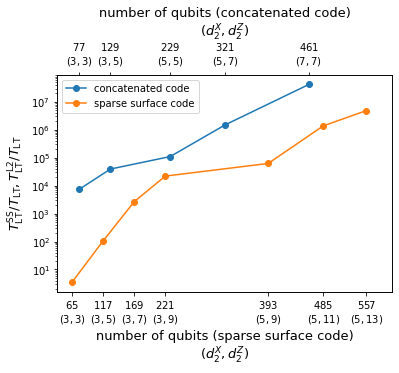

In [12]:
cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([74002053.38809034,392999999,1112314814.814814,15021666666,42091000000.0])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
fig, ax = plt.subplots()
print(number_list)
ax2 = ax.twiny()
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
ax.plot([65,117,169,221,393,485,557], 
        np.array([3.51509345e+04, 1.05939886e+06, 2.68201630e+07, 2.20340540e+08,
 6.23562169e+08, 1.37817323e+10, 4.85916186e+10])/10000,marker='o',label="sparse surface code")
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([65,117,169,221,393,485,557])
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",r"$221$"+"\n"+r"$(3,9)$",
                    r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",r"$557$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$229$"+"\n"+r"$(5,5)$",r"$321$"+"\n"+r"$(5,7)$",r"$461$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(40,600)
ax2.set_xlim(40,600)
ax.legend()
plt.show()

In [ ]:
cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([74002053.38809034,392999999,1112314814.814814,15021666666,42091000000.0])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
fig, ax = plt.subplots()
print(number_list)
ax2 = ax.twiny()
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
ax.plot([65,117,169,221,393,485,557], 
        np.array([3.51509345e+04, 1.05939886e+06, 2.68201630e+07, 2.20340540e+08,
 6.23562169e+08, 1.37817323e+10, 4.85916186e+10])/10000,marker='o',label="sparse surface code")
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([65,117,169,221,393,485,557,829,961])
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",r"$221$"+"\n"+r"$(3,9)$",
                    r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",r"$557$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$229$"+"\n"+r"$(5,5)$",r"$321$"+"\n"+r"$(5,7)$",r"$461$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(40,600)
ax2.set_xlim(40,600)
ax.legend()
plt.show()

In [82]:
d1 = 3

d2 = 3
N1 = 500
pL = 2.3000000000000014e-05
print(d2*(6*N1+4*d1+1)/pL)

d2 = 5
N1 = 1500
pL = 3e-06
print(d2*(6*N1+4*d1+1)/pL)

392999999.99999976
15021666666.666666


# d1 = 5

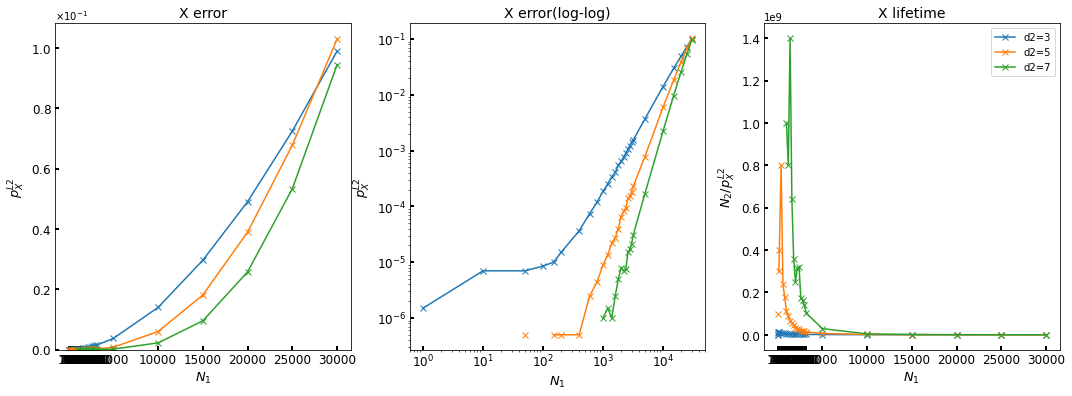

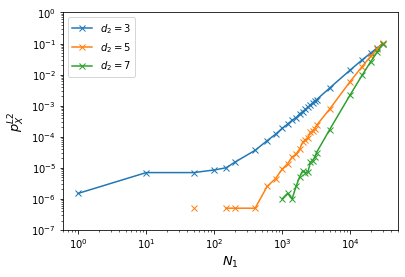

In [50]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0001,eta=1000"

# ファイル名

file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver_last" + ".csv"
#file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data1.index

# データフレームの列名(リスト)を取得
round_list = data1.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='x',label="d2="+str(code_distance_list[i]))
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_X^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("X error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("X error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[1].set_xticks(a)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("X lifetime", fontsize=14)
axes[2].set_xticks(a)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='x',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#ax.set_xticks(a[:8])
#ax.set_xticklabels(a, rotation=45)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e-0)
plt.legend()
plt.show()

[2.09705318]
-10.146820357230343
[2.96955765]
-14.041534048583959
[3.49641063]
-16.8693716246679


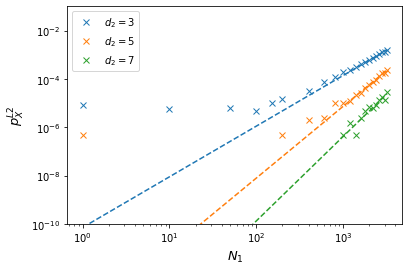

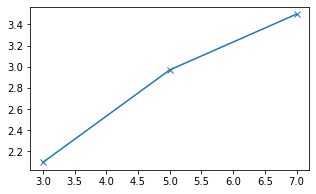

In [33]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-5:], Y[-5:])
    print(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000000001, 0.1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], [2.09705318,2.96955765,3.49641063],marker='x')

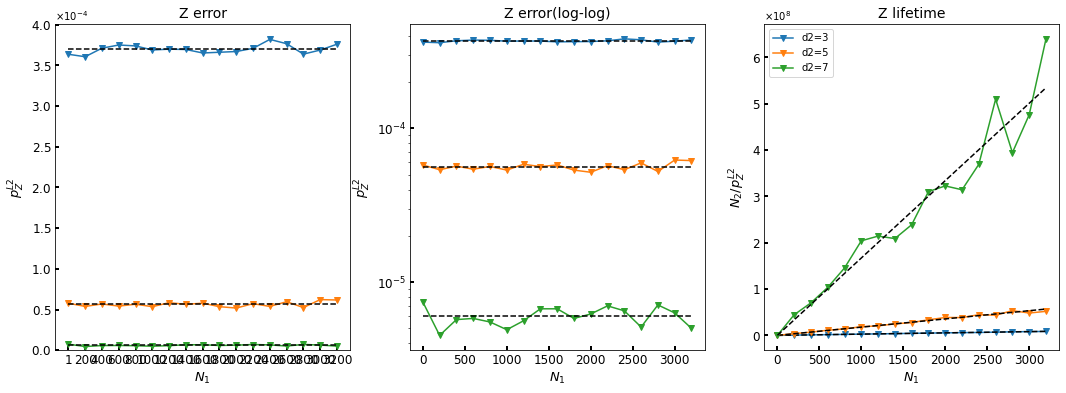

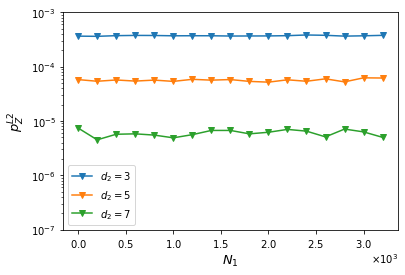

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0001,eta=1000"

# ファイル名
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
#file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
round_list = data2.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[0].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[1].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[1].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[2].plot(a[0:], a[0:]/b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/np.mean(b),marker='',color="k", linestyle = "dashed")
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_Z^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("Z error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("Z error(log-log)", fontsize=14)
#axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[2].set_xscale("log")
#axes[2].set_yscale("log")
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("Z lifetime", fontsize=14)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_yscale("log")
ax.set_ylim(1e-7,1e-3)
plt.legend()
plt.show()

68352272.72727273
1011308411.2149509
13220999999.999994


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/2708407334.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/2708407334.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)


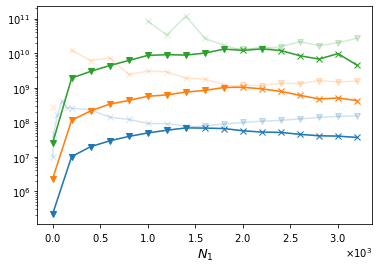

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*5+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[12:], code_distance_list1[i]*(6*a[12:]+4*5+1)/b[12:],marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[0:8], code_distance_list1[i]*(6*c[:8]+4*5+1)/d[0:8],marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[7],a[12]), (code_distance_list1[i]*(6*c[7]+4*5+1)/d[7],code_distance_list1[i]*(6*a[12]+4*5+1)/b[12]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[7]+4*5+1)/d[7])
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*5+1)/b[14:],marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*5+1)/d[:10],marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*5+1)/d[9],code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*5+1)/d[9])
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[16:], code_distance_list1[i]*(6*a[16:]+4*5+1)/b[16:],marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*5+1)/d[:10],marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*5+1)/d[9],code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='',color = cm(i))
        axes.plot((c[11]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11]),marker='v',color = cm(i))
        axes.plot((c[11],a[14]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11],code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='',color = cm(i))
        axes.plot((a[14]), (code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='x',color = cm(i))
        axes.plot((c[11],a[16]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11],code_distance_list1[i]*(6*a[16]+4*5+1)/b[16]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[11]+4*5+1)/d[11])

axes.set_xlabel(r'$N_1$', fontsize=13)
#axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
#plt.legend()
plt.show()

6835.227272727273
101130.84112149509
1322099.9999999995


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_82797/2903171402.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_82797/2903171402.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b/10000,marker='x',color = cm(i),alpha=0.2)


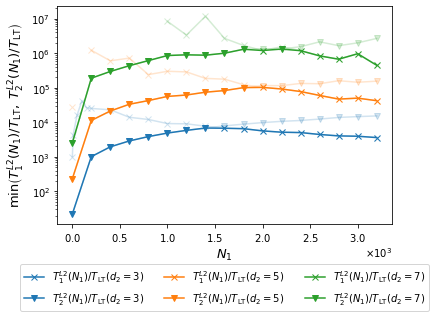

In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*5+1)/d/10000,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[12:], code_distance_list1[i]*(6*a[12:]+4*5+1)/b[12:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/T_{\mathrm{LT}}(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[0:8], code_distance_list1[i]*(6*c[:8]+4*5+1)/d[0:8]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/T_{\mathrm{LT}}(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[7],a[12]), (code_distance_list1[i]*(6*c[7]+4*5+1)/d[7]/10000,code_distance_list1[i]*(6*a[12]+4*5+1)/b[12]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[7]+4*5+1)/d[7]/10000)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*5+1)/b[14:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/T_{\mathrm{LT}}(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*5+1)/d[:10]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/T_{\mathrm{LT}}(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*5+1)/d[9]/10000,code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*5+1)/d[9]/10000)
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[16:], code_distance_list1[i]*(6*a[16:]+4*5+1)/b[16:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/T_{\mathrm{LT}}(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*5+1)/d[:10]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/T_{\mathrm{LT}}(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*5+1)/d[9]/10000,code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]/10000),marker='',color = cm(i))
        axes.plot((c[11]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11]/10000),marker='v',color = cm(i))
        axes.plot((c[11],a[14]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11]/10000,code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]/10000),marker='',color = cm(i))
        axes.plot((a[14]), (code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]/10000),marker='x',color = cm(i))
        axes.plot((c[11],a[16]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11]/10000,code_distance_list1[i]*(6*a[16]+4*5+1)/b[16]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[11]+4*5+1)/d[11]/10000)

axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_{\mathrm{LT}},\ T^{L2}_{2}(N_{1})/T_{\mathrm{LT}}\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_ylim(1,100000000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend(ncol=3,bbox_to_anchor=(1/2, -0.4), loc='lower center', borderaxespad=0)
plt.show()

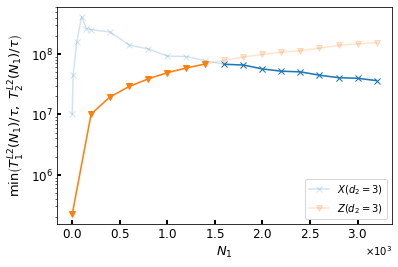

In [90]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(1):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*5+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list1[i])+")",alpha=0.2)
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a[12:], code_distance_list1[i]*(6*a[12:]+4*5+1)/b[12:],marker='x',color = cm(0))
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c[0:8], code_distance_list1[i]*(6*c[:8]+4*5+1)/d[0:8],marker='v',color = cm(1))
    #axes.plot((c[7],a[12]), (code_distance_list1[i]*(6*c[7]+4*5+1)/d[7],code_distance_list1[i]*(6*a[12]+4*5+1)/b[12]),marker='',color = cm(i))

axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.show()

[137. 229. 409. 573. 825.]


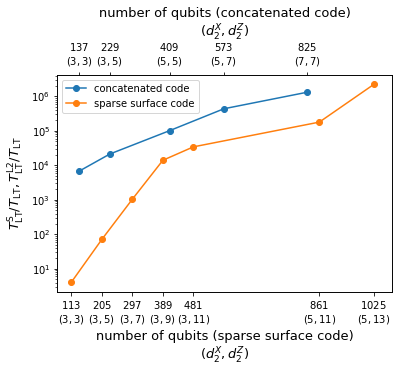

In [32]:
68352272.72727273
1011308411.2149509
13220999999.999994

cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([68352272.72727273,213116197,1011308411.2149509,4370172413,13220999999.999994])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
fig, ax = plt.subplots()
ax2 = ax.twiny()
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
ax.plot([113,205,297,389,481,861,1025], 
        np.array([4.10502339e+04, 7.14762971e+05, 1.04541262e+07, 1.40420291e+08,3.43426440e+08, 1.79298933e+09, 2.21373703e+10])/10000,marker='o',label="sparse surface code")
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([113,205,297,389,481,861,1025])
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",r"$389$"+"\n"+r"$(3,9)$",
                    r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$",r"$1025$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$137$"+"\n"+r"$(3,3)$",r"$229$"+"\n"+r"$(3,5)$",r"$409$"+"\n"+r"$(5,5)$",r"$573$"+"\n"+r"$(5,7)$",r"$825$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(70,1080)
ax2.set_xlim(70,1080)
ax.legend()
plt.show()

In [75]:
d1 = 5
d2 = 5
N1 = 400
pL = 5.680000000000015e-05
print(d2*(6*N1+4*d1+1)/pL)

d2 = 7
N1 = 600
pL = 5.800000000000002e-06
print(d2*(6*N1+4*d1+1)/pL)

213116197.18309805
4370172413.793102


# d1 = 7

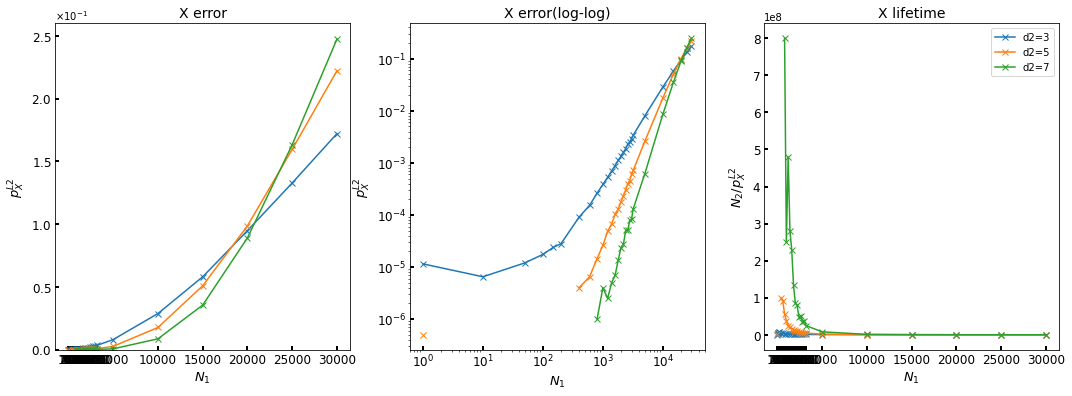

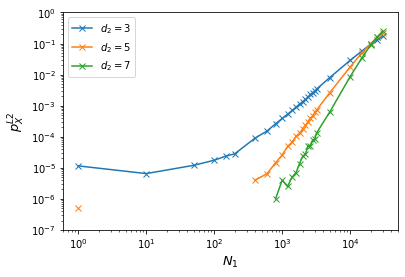

In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0001,eta=1000"

# ファイル名

#file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver1" + ".csv"
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver_last" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data1.index

# データフレームの列名(リスト)を取得
round_list = data1.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='x',label="d2="+str(code_distance_list[i]))
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_X^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("X error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("X error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[1].set_xticks(a)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("X lifetime", fontsize=14)
axes[2].set_xticks(a)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e-0)
plt.legend()
plt.show()

[1.90029781]
-9.140721904130096
[2.84589124]
-13.131246268584857
[3.9220535]
-17.64695201660159


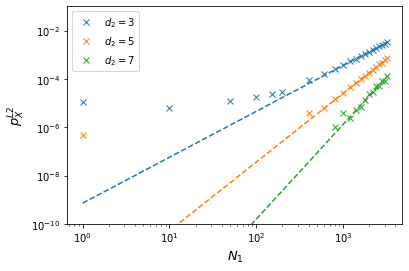

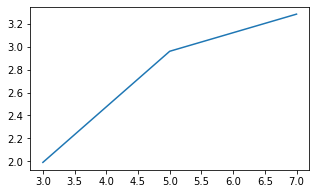

In [22]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-10:], Y[-10:])
    print(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000000001, 0.1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], [1.99050477,2.96059376,3.28489427])

0.0006593294117646117
0.0001318529411764706
1.90647058823529e-05


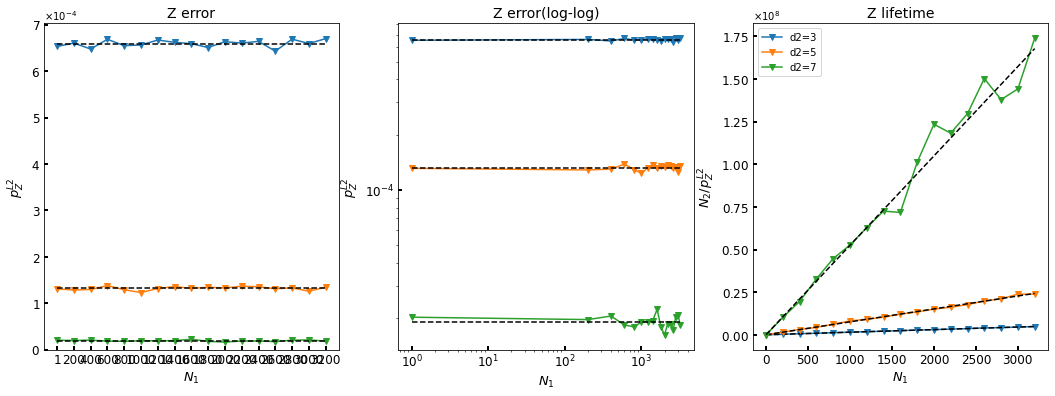

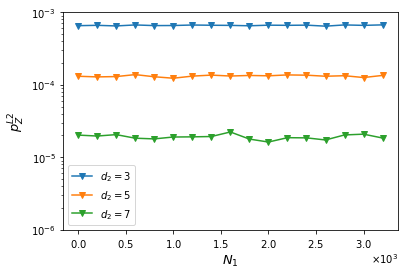

In [60]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0001,eta=1000"

# ファイル名
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
round_list = data2.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    print(np.mean(b))
    axes[0].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[0].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[1].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[1].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[2].plot(a[0:], a[0:]/b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/np.mean(b),marker='',color="k", linestyle = "dashed")
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_Z^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("Z error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("Z error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[2].set_xscale("log")
#axes[2].set_yscale("log")
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("Z lifetime", fontsize=14)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_yscale("log")
ax.set_ylim(1e-6,1e-3)
plt.legend()
plt.show()


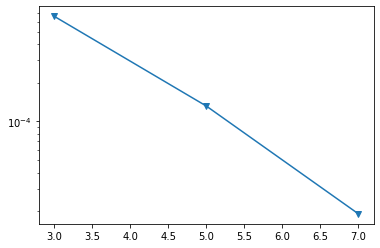

In [61]:
fig, ax = plt.subplots()
ax.plot([3,5,7], [0.0006593294117646117,0.0001318529411764706,1.90647058823529e-05],marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_yscale("log")
plt.show()

[1.0e+00 1.0e+01 5.0e+01 1.0e+02 1.5e+02 2.0e+02 4.0e+02 6.0e+02 8.0e+02
 1.0e+03 1.2e+03 1.4e+03 1.6e+03 1.8e+03 2.0e+03 2.2e+03 2.4e+03 2.6e+03
 2.8e+03 3.0e+03 3.2e+03]
[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 5.00e-07 1.50e-06 5.00e-07 2.50e-06 4.50e-06 7.00e-06 6.00e-06
 8.50e-06 1.30e-05 1.75e-05 1.30e-05 3.00e-05]
36201861.13100017
403164556.9620253
3583106382.9787207


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/909637215.py:50: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_95909/909637215.py:50: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)


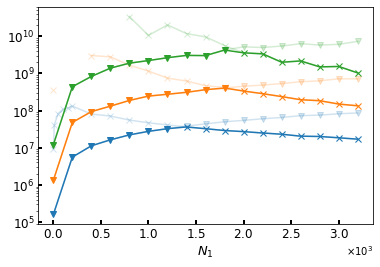

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver1" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

print(a)
print(b)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*7+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[11:], code_distance_list1[i]*(6*a[11:]+4*7+1)/b[11:],marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[0:7], code_distance_list1[i]*(6*c[:7]+4*7+1)/d[0:7],marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[6],a[11]), (code_distance_list1[i]*(6*c[6]+4*7+1)/d[6],code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[11]+4*7+1)/b[11])
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*7+1)/b[14:],marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*7+1)/d[:10],marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*7+1)/d[9],code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*7+1)/d[9])
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*7+1)/b[14:],marker='x',label=r"$T^{L2}_{1}(N_{1})/\tau(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*7+1)/d[:10],marker='v',label=r"$T^{L2}_{2}(N_{1})/\tau(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*7+1)/d[9],code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[14]+4*7+1)/b[14])

axes.set_xlabel(r'$N_1$', fontsize=13)
#axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
#plt.legend()
plt.show()

3620.186113100017
40316.45569620253
358310.6382978721


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_82797/1049054545.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_82797/1049054545.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b/10000,marker='x',color = cm(i),alpha=0.2)


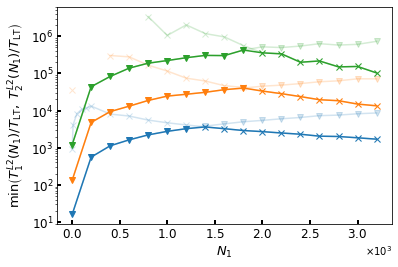

In [64]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver1" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)


cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b/10000,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*7+1)/d/10000,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[11:], code_distance_list1[i]*(6*a[11:]+4*7+1)/b[11:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/T_{2}(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[0:7], code_distance_list1[i]*(6*c[:7]+4*7+1)/d[0:7]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/T_{2}(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[6],a[11]), (code_distance_list1[i]*(6*c[6]+4*7+1)/d[6]/10000,code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]/10000)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*7+1)/b[14:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/T_{2}(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*7+1)/d[:10]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/T_{2}(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*7+1)/d[9]/10000,code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*7+1)/d[9]/10000)
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*7+1)/b[14:]/10000,marker='x',label=r"$T^{L2}_{1}(N_{1})/T_{2}(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*7+1)/d[:10]/10000,marker='v',label=r"$T^{L2}_{2}(N_{1})/T_{2}(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*7+1)/d[9]/10000,code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]/10000),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]/10000)

axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_{\mathrm{LT}},\ T^{L2}_{2}(N_{1})/T_{\mathrm{LT}}\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
#plt.legend()
plt.show()

con [ 197.  329.  589.  825. 1189.]


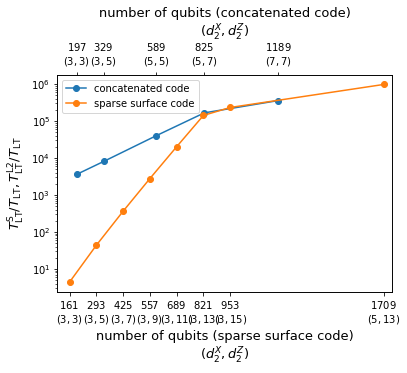

In [70]:
36201861.13100017
403164556.9620253
3583106382.9787207

cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([36201861.13100017,80519337,403164556.9620253,1665172414,3583106382.9787207])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(7,cd[0],cd[1]))
print("con",number_list)
fig, ax = plt.subplots()
ax2 = ax.twiny()
#conc
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$197$"+"\n"+r"$(3,3)$",r"$329$"+"\n"+r"$(3,5)$",r"$589$"+"\n"+r"$(5,5)$",r"$825$"+"\n"+r"$(5,7)$",r"$1189$"+"\n"+r"$(7,7)$"])

#sparse
ax.plot([161,293,425,557,689,821,953,1709], np.array([4.36000633e+04, 4.33196741e+05, 3.61545140e+06, 2.77112623e+07,2.01909055e+08,1.42251147e+09,2.33160439e+09,9.78482345e+09])/10000,marker='o',label="sparse surface code")
ax.set_xticks([161,293,425,557,689,821,953,1709])
ax.set_xticklabels([r"$161$"+"\n"+r"$(3,3)$",r"$293$"+"\n"+r"$(3,5)$",r"$425$"+"\n"+r"$(3,7)$",r"$557$"+"\n"+r"$(3,9)$",r"$689$"+"\n"+r"$(3,11)$",r"$821$"+"\n"+r"$(3,13)$",r"$953$"+"\n"+r"$(3,15)$",r"$1709$"+"\n"+r"$(5,13)$"])

ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_yscale("log")
ax.set_xlim(100,1750)
ax2.set_xlim(100,1750)
ax.legend()
plt.show()

In [66]:
d1 = 7
d2 = 3
N1 = 400
pL = 9.050000000000007e-05
print(d2*(6*N1+4*d1+1)/pL)

d2 = 5
N1 = 800
pL = 1.4500000000000007e-05
print(d2*(6*N1+4*d1+1)/pL)

qubits_number(d1,7,5)

80519337.01657452
1665172413.7931027


849

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_15799/828122567.py:50: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_15799/828122567.py:50: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_15799/828122567.py:50: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_15799/828122567.py:52: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_15799/828122567.p

7400.205338809034
111231.4814814814
4209100.0
6835.227272727273
101130.84112149509
1322099.9999999993
3620.186113100017
40316.45569620252
358310.63829787204


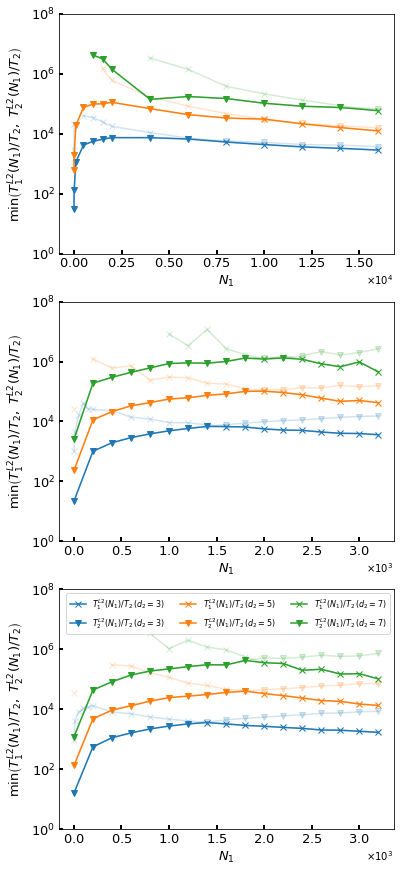

In [46]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

fig, axes = plt.subplots(3,1,figsize=(6,15))

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=1000000,ver0のコピー" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data1 = 10000*data1
data2 = pd.read_csv(file2, index_col=0)
data2 = 10000*data2

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes[0].plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes[0].plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[0].plot(a[9:], code_distance_list1[i]*(6*a[9:]+4*3+1)/b[9:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list1[i]])
        axes[0].plot(c[0:9], code_distance_list2[i]*(6*c[0:9]+4*3+1)/d[0:9],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[0].plot((c[8],a[9]), (code_distance_list1[i]*(6*c[8]+4*3+1)/d[8],code_distance_list1[i]*(6*a[9]+4*3+1)/b[9]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[6]+4*3+1)/d[6])
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[0].plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*3+1)/b[10:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[0].plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*3+1)/d[:10],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[0].plot((c[9],a[10]), (code_distance_list1[i]*(6*c[9]+4*3+1)/d[9],code_distance_list1[i]*(6*a[10]+4*3+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[6]+4*3+1)/d[6])
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[0].plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*3+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[0].plot(c[:13], code_distance_list2[i]*(6*c[:13]+4*3+1)/d[:13],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[0].plot((c[12],a[13]), (code_distance_list1[i]*(6*c[12]+4*3+1)/d[12],code_distance_list1[i]*(6*a[13]+4*3+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[4]+4*3+1)/d[4])
axes[0].set_xlabel(r'$N_1$', fontsize=13)
axes[0].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_{2},\ T^{L2}_{2}(N_{1})/T_{2} \right)$', fontsize=18)
axes[0].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes[0].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_ylim(10,100000000)
#axes.set_xticks(a)
#axes.set_xticklabels(a, rotation=45)
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes[0].set_yscale("log")

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0001,eta=1000"
# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver0" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data1 = 10000*data1
data2 = pd.read_csv(file2, index_col=0)
data2 = 10000*data2

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes[1].plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes[1].plot(c, code_distance_list1[i]*(6*c+4*5+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[1].plot(a[12:], code_distance_list1[i]*(6*a[12:]+4*5+1)/b[12:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[1].plot(c[0:8], code_distance_list1[i]*(6*c[:8]+4*5+1)/d[0:8],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[1].plot((c[7],a[12]), (code_distance_list1[i]*(6*c[7]+4*5+1)/d[7],code_distance_list1[i]*(6*a[12]+4*5+1)/b[12]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[7]+4*5+1)/d[7])
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[1].plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*5+1)/b[14:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[1].plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*5+1)/d[:10],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[1].plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*5+1)/d[9],code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*5+1)/d[9])
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[1].plot(a[16:], code_distance_list1[i]*(6*a[16:]+4*5+1)/b[16:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[1].plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*5+1)/d[:10],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[1].plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*5+1)/d[9],code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='',color = cm(i))
        axes[1].plot((c[11]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11]),marker='v',color = cm(i))
        axes[1].plot((c[11],a[14]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11],code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='',color = cm(i))
        axes[1].plot((a[14]), (code_distance_list1[i]*(6*a[14]+4*5+1)/b[14]),marker='x',color = cm(i))
        axes[1].plot((c[11],a[16]), (code_distance_list1[i]*(6*c[11]+4*5+1)/d[11],code_distance_list1[i]*(6*a[16]+4*5+1)/b[16]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[11]+4*5+1)/d[11])

axes[1].set_xlabel(r'$N_1$', fontsize=13)
#axes[1].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes[1].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes[1].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes[1].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[1].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
axes[1].set_ylim(10,100000000)
#axes.set_xscale("log")
axes[1].set_yscale("log")

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0001,eta=1000"

# ファイル名
file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=2000000,ver1" + ".csv"
file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data1 = 10000*data1
data2 = pd.read_csv(file2, index_col=0)
data2 = 10000*data2

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes[2].plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes[2].plot(c, code_distance_list1[i]*(6*c+4*7+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[2].plot(a[11:], code_distance_list1[i]*(6*a[11:]+4*7+1)/b[11:],marker='x',label=r'$T^{L2}_{1}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[2].plot(c[0:7], code_distance_list1[i]*(6*c[:7]+4*7+1)/d[0:7],marker='v',label=r'$T^{L2}_{2}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list2[i])+")",color = cm(i))
        axes[2].plot((c[6],a[11]), (code_distance_list1[i]*(6*c[6]+4*7+1)/d[6],code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[11]+4*7+1)/b[11])
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[2].plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*7+1)/b[14:],marker='x',label=r'$T^{L2}_{1}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[2].plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*7+1)/d[:10],marker='v',label=r'$T^{L2}_{2}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list2[i])+")",color = cm(i))
        axes[2].plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*7+1)/d[9],code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*7+1)/d[9])
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[2].plot(a[14:], code_distance_list1[i]*(6*a[14:]+4*7+1)/b[14:],marker='x',label=r'$T^{L2}_{1}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[2].plot(c[:10], code_distance_list1[i]*(6*c[:10]+4*7+1)/d[:10],marker='v',label=r'$T^{L2}_{2}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list2[i])+")",color = cm(i))
        axes[2].plot((c[9],a[14]), (code_distance_list1[i]*(6*c[9]+4*7+1)/d[9],code_distance_list1[i]*(6*a[14]+4*7+1)/b[14]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[14]+4*7+1)/b[14])

axes[2].set_xlabel(r'$N_1$', fontsize=13)
#axes[2].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes[2].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes[2].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

axes[0].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_2,\ T^{L2}_{2}(N_{1})/T_2 \right)$', fontsize=13)
axes[1].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_2,\ T^{L2}_{2}(N_{1})/T_2 \right)$', fontsize=13)
axes[2].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_2,\ T^{L2}_{2}(N_{1})/T_2 \right)$', fontsize=13)

axes[0].set_xlabel(r'$N_1$', fontsize=13)
axes[1].set_xlabel(r'$N_1$', fontsize=13)
axes[2].set_xlabel(r'$N_1$', fontsize=13)

axes[0].tick_params(direction="in", width=2, length=4, labelsize=13)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=13)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=13)

axes[0].set_ylim(1,100000000)
axes[1].set_ylim(1,100000000)
axes[2].set_ylim(1,100000000)
plt.legend(ncol=3,fontsize=8)
axes[2].set_yscale("log")

plt.legend(ncol=3,fontsize=8)
plt.show()